In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from matplotlib import animation, rc
from IPython.display import HTML

#from covid_abs.graphics import *
from covid_abs.no_graphics import *
from covid_abs.experiments import *
from covid_abs.network.graph_abs import *
from covid_abs.network.util import *

## Plotting

In [98]:
from covid_abs.no_graphics import  *
import matplotlib as pyplot
from IPython import display

def plot_statistics(statistics):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
    
    for key in statistics['info'][0]:
        y = [e[key] for e in statistics['info']]

        ax1.plot(np.arange(len(y)), y, label=key)
    ax1.set_title('Infection statistics')
        
    for key in statistics['ecom'][0]:
        y = [e[key] for e in statistics['ecom']]

        ax2.plot(np.arange(len(y)), y, label=key)
    ax2.set_title('Economic statistics')

    ax1.legend()
    ax2.legend()
    plt.show()
    
def plot_single(output, save_plot=False):
    steps_per_episode = output[0]
    episode_losses = output[1]
    losses = output[2]
    actions = output[3]
    rewards = output[4]
    qs = output[5]

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 16))

    n_episodes = len(episode_losses)


    fontsizes = {
        'suptitle': 28,
        'title': 26,
        'legend': 18,
        'axis': 20,
        'ticks': 14
    }

    # Plot loss

    y = list(losses)
    x = np.linspace(0, n_episodes, len(y))
    ax1.plot(x, y, color='#ff1717', alpha=0.5)
    ax1.plot(episode_losses, color='#ff1717')

    ax1.set_title('Loss', fontsize=fontsizes['title'])
    ax1.set_xlabel('Episode', fontsize=fontsizes['axis'])
    ax1.tick_params(axis='both', which='major', labelsize=fontsizes['ticks'])
    ax1.set_yscale('log')

    # Plot actions

    y = list(actions)
    x = np.linspace(0, n_episodes, len(y))
    mov_av = np.convolve(y, np.ones(1000)/1000, mode='valid')
    mov_av_x = np.linspace(0, n_episodes, len(mov_av))
    ax2.scatter(x, y, s=0.1)
    ax2.plot(mov_av_x, mov_av, color='#ff1717', label='Moving average (N=1000)')

    ax2.set_title('Actions', fontsize=fontsizes['title'])
    ax2.set_xlabel('Episode', fontsize=fontsizes['axis'])
    ax2.tick_params(axis='both', which='major', labelsize=fontsizes['ticks'])
    ax2.legend(fontsize=fontsizes['legend'])

    # Plot cumulative rewards

    rewards = list(rewards)
    cum_rewards = []
    for episode_steps in steps_per_episode:
        cum_rewards += list(np.cumsum(rewards[episode_steps[0]:episode_steps[1]]))
    
    y = list(cum_rewards)
    x = np.linspace(0, n_episodes, len(y))
    for i, episode_steps in enumerate(steps_per_episode):
        ax3.plot(x[episode_steps[0]:episode_steps[1]],
                 y[episode_steps[0]:episode_steps[1]],
                 color= '#adc7c9' if i%2 == 0 else '#20adbd')

    mov_av = np.convolve(y, np.ones(1000)/1000, mode='valid')
    mov_av_x = np.linspace(0, n_episodes, len(mov_av))
    ax3.plot(mov_av_x, mov_av, color='red', label='Moving average (N=1000)')

    ax3.set_title('Cumulative rewards', fontsize=fontsizes['title'])
    ax3.set_xlabel('Episode', fontsize=fontsizes['axis'])
    ax3.tick_params(axis='both', which='major', labelsize=fontsizes['ticks'])
    ax3.legend(fontsize=fontsizes['legend'])

    # Plot q values

    y = list(qs)
    x = np.linspace(0, n_episodes, len(y))
    for i, episode_steps in enumerate(steps_per_episode):
        ax4.plot(x[episode_steps[0]:episode_steps[1]],
                 y[episode_steps[0]:episode_steps[1]],
                 color= '#adc7c9' if i%2 == 0 else '#20adbd')
    mov_av = np.convolve(y, np.ones(1000)/1000, mode='valid')
    mov_av_x = np.linspace(0, n_episodes, len(mov_av))
    ax4.plot(mov_av_x, mov_av, color='#ff1717', label='Moving average (N=1000)')

    ax4.set_title('Q values', fontsize=fontsizes['title'])
    ax4.set_xlabel('Episode', fontsize=fontsizes['axis'])
    ax4.tick_params(axis='both', which='major', labelsize=fontsizes['ticks'])
    ax4.legend(fontsize=fontsizes['legend'])
    
    plt.tight_layout()

    if save_plot:
        plt.savefig('plots/LSTM Linear, features{}, hidden{}'.format(n_features, hidden_size) +
                    'episodes{}, batch{} sequence_size{}'.format(n_episodes, BATCH_SIZE, SEQUENCE_SIZE) +
                    'target_update{} steps_per_update{}.png'.format(TARGET_UPDATE, UPDATE_EVERY_N_STEPS))
    plt.show()
    
def plot_multiple(outputs, save_plot=False):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 16))

    for i in range(len(outputs)):

        steps_per_episode = outputs[i][0]
        episode_losses = outputs[i][1]
        losses = outputs[i][2]
        actions = outputs[i][3]
        rewards = outputs[i][4]
        qs = outputs[i][5]

        n_episodes = len(episode_losses)


        fontsizes = {
            'suptitle': 28,
            'title': 26,
            'legend': 18,
            'axis': 20,
            'ticks': 14
        }

        # Plot loss

        y = list(losses)
        x = np.linspace(0, n_episodes, len(y))
        ax1.plot(x, y, color='#ff1717', alpha=0.3)
        ax1.plot(episode_losses, color='#ff1717')

        ax1.set_title('Loss', fontsize=fontsizes['title'])
        ax1.set_xlabel('Episode', fontsize=fontsizes['axis'])
        ax1.tick_params(axis='both', which='major', labelsize=fontsizes['ticks'])
        ax1.set_yscale('log')

        # Plot actions

        y = list(actions)
        x = np.linspace(0, n_episodes, len(y))
        mov_av = np.convolve(y, np.ones(1000)/1000, mode='valid')
        mov_av_x = np.linspace(0, n_episodes, len(mov_av))
        ax2.scatter(x, y, s=0.1)
        ax2.plot(mov_av_x, mov_av, color='#ff1717', label='Moving average (N=1000)' if i == 0 else '')

        ax2.set_title('Actions', fontsize=fontsizes['title'])
        ax2.set_xlabel('Episode', fontsize=fontsizes['axis'])
        ax2.tick_params(axis='both', which='major', labelsize=fontsizes['ticks'])
        ax2.legend(fontsize=fontsizes['legend'])

        # Plot cumulative rewards

        rewards = list(rewards)
        cum_rewards = []
        for episode_steps in steps_per_episode:
            cum_rewards += list(np.cumsum(rewards[episode_steps[0]:episode_steps[1]]))

        y = cum_rewards
        x = np.linspace(0, n_episodes, len(y))
        for i, episode_steps in enumerate(steps_per_episode):
            ax3.plot(x[episode_steps[0]:episode_steps[1]],
                     y[episode_steps[0]:episode_steps[1]],
                     color= '#adc7c9' if i%2 == 0 else '#20adbd')

        mov_av = np.convolve(y, np.ones(1000)/1000, mode='valid')
        mov_av_x = np.linspace(0, n_episodes, len(mov_av))
        ax3.plot(mov_av_x, mov_av, color='red', label='Moving average (N=1000)' if i == 0 else '')

        ax3.set_title('Cumulative rewards', fontsize=fontsizes['title'])
        ax3.set_xlabel('Episode', fontsize=fontsizes['axis'])
        ax3.tick_params(axis='both', which='major', labelsize=fontsizes['ticks'])
        ax3.legend(fontsize=fontsizes['legend'])

        # Plot q values

        y = list(qs)
        x = np.linspace(0, n_episodes, len(y))
        mov_av = np.convolve(y, np.ones(1000)/1000, mode='valid')
        mov_av_x = np.linspace(0, n_episodes, len(mov_av))
        ax4.scatter(x, y, s=0.1)
        ax4.plot(mov_av_x, mov_av, color='#ff1717', label='Moving average (N=1000)' if i == 0 else '')

        ax4.set_title('Q values', fontsize=fontsizes['title'])
        ax4.set_xlabel('Episode', fontsize=fontsizes['axis'])
        ax4.tick_params(axis='both', which='major', labelsize=fontsizes['ticks'])
        ax4.legend(fontsize=fontsizes['legend'])

    plt.tight_layout()

    if save_plot:
        plt.savefig('plots/LSTM Linear, features{}, hidden{}'.format(n_features, hidden_size) +
                    'episodes{}, batch{} sequence_size{}'.format(n_episodes, BATCH_SIZE, SEQUENCE_SIZE) +
                    'target_update{} steps_per_update{}.png'.format(TARGET_UPDATE, UPDATE_EVERY_N_STEPS))
    plt.show()

# Helpers

In [88]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")

torch.set_default_dtype(torch.float64)

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))
OptimizerSpec = namedtuple('OptimizerSpec', ['constructor', 'kwargs'])

class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([],maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    # sample a batch of states
    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    # sample random sequences from the replaymemory
    def sample_sequence(self, sequence_length):
        if self.memory[-1].next_state is not None:
            start_index = random.randint(0, len(self)-1-sequence_length)
        else:
            start_index = random.randint(0, len(self)-1)
        
        sequence = deque([], maxlen=sequence_length)
        
        for i in range(start_index, start_index+sequence_length):
            transition = self.memory[i]
            if transition.next_state is None:
                for j in range(0, sequence_length+start_index-i):
                    transition = Transition(transition.state,
                                            transition.action,
                                            transition.state,
                                            transition.reward)
                    sequence.append(transition)
                break
            else:
                sequence.append(transition)
        return list(sequence)
    
    # sample a batch of sequences
    def sample_sequences(self, batch_size, sequence_length):
        return [self.sample_sequence(sequence_length) for i in range(batch_size)]

    def __len__(self):
        return len(self.memory)
    
def get_previous_action():
    if len(memory) == 0 or memory.memory[-1].next_state is None:
        return 0.0
    else:
        return memory.memory[-1].action.item()
    
def create_sequence(state):
    x = [torch.tensor(state, device=device)]
    if len(memory) == 0:
        x = x * SEQUENCE_SIZE
    else:
        for count in range(1, SEQUENCE_SIZE):
            i = len(memory) - 1 - count
            if i < 0:
                x = [memory.memory[0].state] * i + x
                break
            elif memory.memory[i].next_state is None:
                x = [memory.memory[i+1].state] * i + x
                break
            else:
                x.insert(0, memory.memory[i].state)
    
    return torch.cat(x).view(-1, state_size).to(device)

# Test Scenario
This scenarios' intention is to distill the problem of our NNs not converging to the desired result in a really simple scenario. It has nothing to do with the COVID model, which is examined further down, but has the same fundamental problem.

Here the AI should figure out to either only choose action 0 or 1 depending on the reward. In this scenario, choosing action 1 gives a positive reward, while choosing action 0 gives a negative reward. This scenario is used as an example of how our reinforcement learning doesn't seem to work for some reason. It might not be completely applicable, as the state in this scenario is just the last action. Its not clear if this is sufficient for the NN to learn that it should always choose action 1, but intuitvely it just needs to know which action it chose and which rewards it got and then should in theory learn VERY easily to choose 1.

The DQN code is mostly adapted from https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html, the "optimize_model" and "select_action" function are pretty much copy and pasted in this scenario. In the covid model further down below, it is adapted to support sequences of states.

### Necessary functions for this scenario

In [84]:
def train(model, state_size, n_actions, get_state_func, select_action_func, reward_func, optimize_func, optimizer_spec):
    
    starttime = time.time()
    
    # Initialize metrics
    steps_per_episode = deque([])
    episode_losses = deque([])
    losses = deque([])
    actions = deque([])
    rewards = deque([])
    qs = deque([])
    
    # Initalize policy and target model
    policy_net = model(state_size, n_actions).to(device)
    target_net = model(state_size, n_actions).to(device)
    target_net.load_state_dict(policy_net.state_dict())
    target_net.eval()
    
    # Initialize optimizer
    optimizer = optimizer_spec.constructor(policy_net.parameters(), **optimizer_spec.kwargs)
    
    steps_done = 0
    
    for i_episode in range(NUM_EPISODES):
        
        start_steps_done = steps_done
        
        state = get_state_func(None)
        for t in count():
            # Select and perform an action
            action = select_action(state, policy_net, steps_done)
            
            _, reward, done, _ = step(None, None, action.item())
            steps_done += 1

            actions.append(action.item())
            rewards.append(reward)
            
            qs.append(torch.max(policy_net(create_sequence(state))).item())

            reward = torch.tensor([reward], device=device)
            
            # Observe new state
            if not done:
                next_state = get_state(None)
            else:
                next_state = None

            # Store the transition in memory
            memory.push(state, action, next_state, reward)

            # Move to the next state
            state = next_state

            # Perform one step of the optimization (on the policy network)
            
            loss = optimize_func(steps_done, policy_net, target_net, optimizer)
            if loss is not None:
                losses.append(loss)
            
            if done:
                steps_per_episode.append((start_steps_done, steps_done))
                break
        # Update the target network, copying all weights and biases in DQN
        if i_episode % TARGET_UPDATE == 0:
            target_net.load_state_dict(policy_net.state_dict())
        if len(losses) == 0:
            losses.append(0)
        episode_losses.append(losses[-1])
        print('Episode:', i_episode+1, 'Steps done:', steps_done, 'Loss:', episode_losses[-1])
        
    print('Training took {} seconds.'.format(time.time()-starttime))
    
    return steps_per_episode, episode_losses, losses, actions, rewards, qs

# Test scenario

In [91]:
# The state in this scenario only consists of the last action
# and should be used to figure out that only choosing action 1 leads to high rewards
def get_state(statistics):
    return torch.tensor([float(get_previous_action())], device=device)

# Action selection method
def select_action(state, policy_net, steps_done):
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return torch.argmax(policy_net(state)[-1]).view(1, 1)
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)

done_timer = 0
# Environment step method
# normally the simulation and statistics are passed along, in this scenario they are passed but ignored
def step(sim, statistics, action):
    global done_timer
    state = get_state(None)
    reward = calc_reward(state, action)
    
    done = False
    if done_timer == 500:
        done = True
        done_timer = 0
        reward = 0
    done_timer += 1
    
    return _, reward, done, _

# Reward calculation method
def calc_reward(state, action, g=0.1):
    return g * (action == 1)


def optimize_model(steps_done, policy_net, target_net, optimizer):
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None]).view(-1, state_size)
    
    state_batch = torch.cat(batch.state).view(-1, state_size)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    last_loss = loss.item()
    
    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()
    
    return last_loss

## Model


In [95]:
# really simple model, which should be able to figure out that choosing action=1 leads to high reward.
class DQN(nn.Module):

    def __init__(self, input_size, output_size):
        super(DQN, self).__init__()
        
        self.linear1 = nn.Linear(input_size, 8)
        self.linear2 = nn.Linear(8, output_size)

    def forward(self, x):
        x = x.to(device)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        return x.view(x.size(0), -1)

## Train

In [96]:
MEMORY_SIZE = 10000

# For training
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.00
EPS_DECAY = 1000
TARGET_UPDATE = 2

# For optimizer
LEARNING_FREQ = 4
LEARNING_RATE = 0.00025
ALPHA = 0.95
EPS = 0.01

SEQUENCE_SIZE = 1

NUM_EPISODES = 10

state_size = 1
n_actions = 2

optimizer_spec = OptimizerSpec(
    constructor=optim.RMSprop,
    kwargs=dict(lr=LEARNING_RATE, alpha=ALPHA, eps=EPS)
)

memory = ReplayMemory(MEMORY_SIZE)

# Train outputs are metrics by which the training can be examined:
# 0: array containing the steps per episode
# 1: array containing the losses per episode
# 2: array containing all losses
# 3: array containing all actions
# 4: array containing all rewards

# Train once

#output = train(DQN, state_size, n_actions, get_state, select_action, calc_reward, optimize_model, optimizer_spec)


# Train multiple times

outputs = []

for i in range(5):
    print('Training Nr. {}'.format(i+1))
    output = train(DQN, state_size, n_actions, get_state, select_action, calc_reward, optimize_model, optimizer_spec)
    
    outputs.append(output)

Training Nr. 1
Episode: 1 Steps done: 500 Loss: 0.04796648307476454
Episode: 2 Steps done: 1000 Loss: 0.08139238459391174
Episode: 3 Steps done: 1500 Loss: 0.09189554506890693
Episode: 4 Steps done: 2000 Loss: 0.13637333793523643
Episode: 5 Steps done: 2500 Loss: 0.13831428116621972
Episode: 6 Steps done: 3000 Loss: 0.18915830866101435
Episode: 7 Steps done: 3500 Loss: 0.1818955469032262
Episode: 8 Steps done: 4000 Loss: 0.26312667816209884
Episode: 9 Steps done: 4500 Loss: 0.24680451003151122
Episode: 10 Steps done: 5000 Loss: 0.31874893252507464
Training took 12.110034704208374 seconds.
Training Nr. 2
Episode: 1 Steps done: 500 Loss: 0.002037215448506921
Episode: 2 Steps done: 1000 Loss: 0.0021580634168123732
Episode: 3 Steps done: 1500 Loss: 0.0022327847385133215
Episode: 4 Steps done: 2000 Loss: 0.0025033568292237157
Episode: 5 Steps done: 2500 Loss: 0.002503197363856201
Episode: 6 Steps done: 3000 Loss: 0.0021305133060894447
Episode: 7 Steps done: 3500 Loss: 0.002308797097599558
E

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


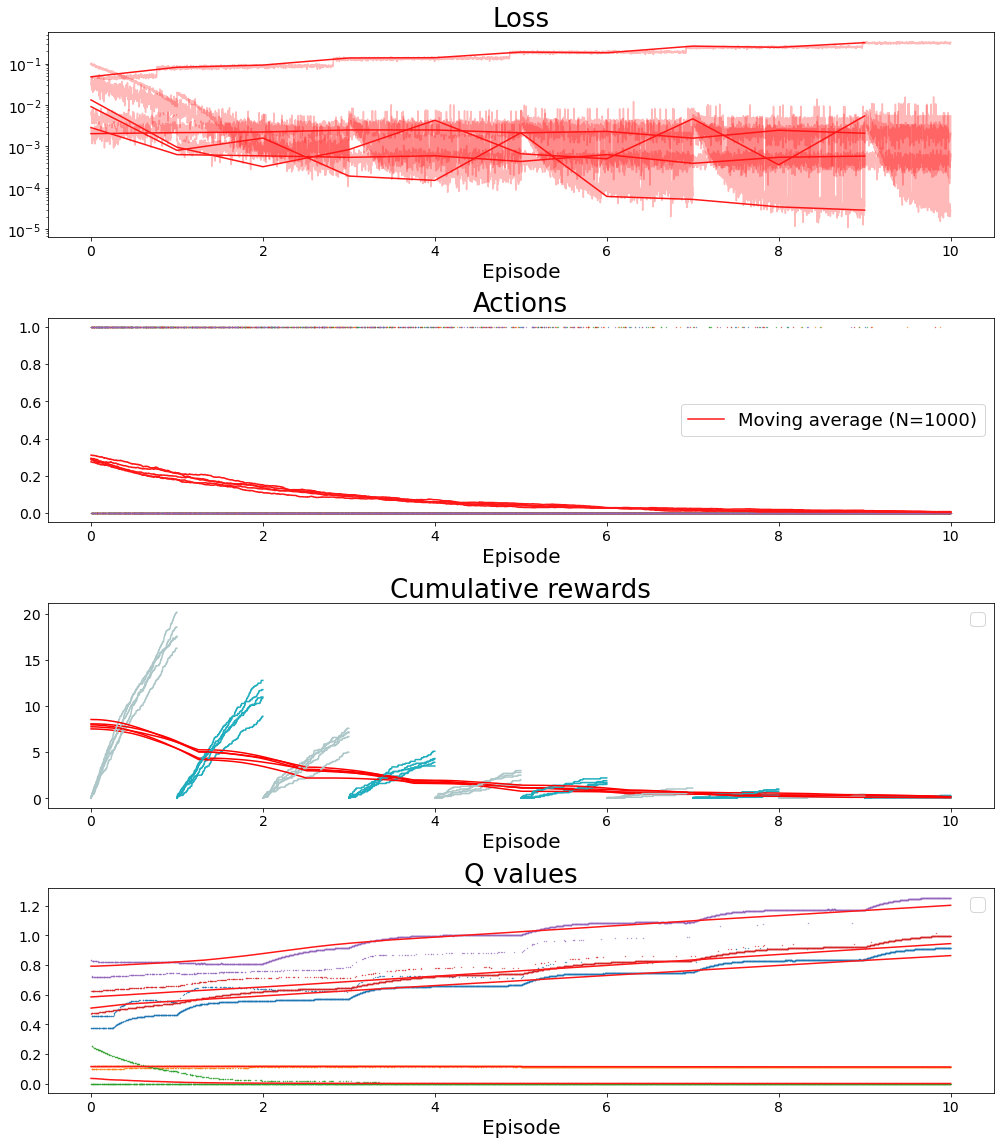

In [99]:
#plot_single(output)
plot_multiple(outputs)